In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# %tensorflow_version only exists in Colab.
%tensorflow_version 2.x

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pathlib
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os


print("Num GPUs Available: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))
print("Tensorflow version: ", tf.__version__) 

TensorFlow 2.x selected.
Num GPUs Available:  1
Tensorflow version:  2.1.0


#Dataset Import and Overview

id       object
breed    object
dtype: object
                                 id               breed
0  a32893132f6fbb3635df77c157c7d8e0  scottish_deerhound
1  3b3ae8c92f704bf449ea4bc61866461b  scottish_deerhound
2  c9bbc4ce586c0d73e14bee1b1e674ba9  scottish_deerhound
3  f194e48d99e5e0f279eb8cd5e6872e36  scottish_deerhound
4  03dc61595ad9dbf49e3998cf586ca8cb  scottish_deerhound
Number of classes:  35
Classes:
['afghan_hound' 'airedale' 'australian_terrier' 'basenji' 'beagle'
 'bernese_mountain_dog' 'blenheim_spaniel' 'border_terrier' 'cairn' 'chow'
 'entlebucher' 'great_pyrenees' 'ibizan_hound' 'irish_wolfhound'
 'italian_greyhound' 'japanese_spaniel' 'lakeland_terrier' 'leonberg'
 'lhasa' 'maltese_dog' 'miniature_pinscher' 'newfoundland'
 'norwegian_elkhound' 'papillon' 'pembroke' 'pomeranian' 'pug' 'saluki'
 'samoyed' 'scottish_deerhound' 'shih-tzu' 'siberian_husky'
 'silky_terrier' 'tibetan_terrier' 'whippet']
Number of images: 2205
Number of beagle images: 63


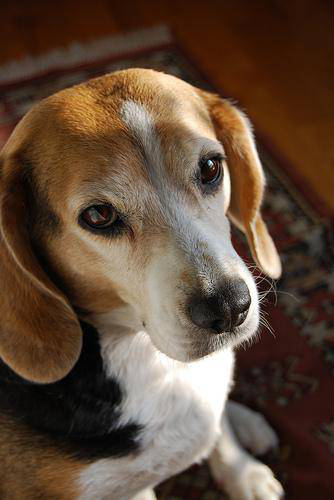

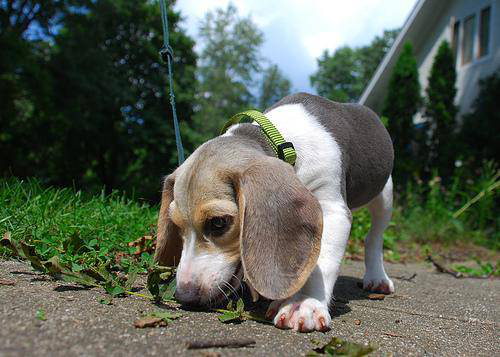

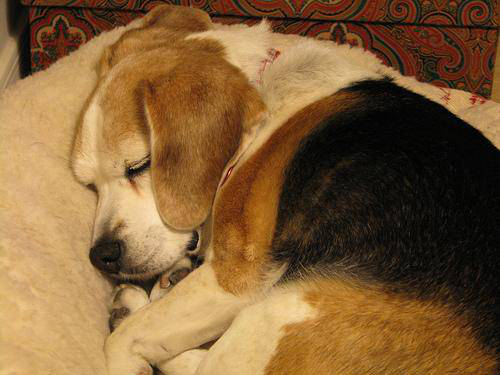

In [5]:
#LABELS_URL = "https://www.dropbox.com/s/httj9tburv389qh/train_labels.csv?dl=1"
#LABELS_FILE = tf.keras.utils.get_file("labels.csv", LABELS_URL)

#LABELS_FILE = "/kaggle/input/aw18-19/train_labels.csv"
LABELS_FILE = "/content/drive/My Drive/dogs/train_labels.csv"
#LABELS_FILE = "dogs/train_labels.csv"

df = pd.read_csv(LABELS_FILE)
print(df.dtypes)
print(df.head())

CLASS_NAMES = np.unique(df.breed)
num_class = len(CLASS_NAMES)
print("Number of classes: ", num_class)
print("Classes:")
print(CLASS_NAMES)

#data_dir = tf.keras.utils.get_file(origin='https://www.dropbox.com/s/mfb1plls1gusr4m/Dataset.zip?dl=1',
#                                         fname='dog_breeds', extract=True)
data_dir = "/content/drive/My Drive/dogs/Dataset/train"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images:", image_count)

beagle = list(data_dir.glob('beagle/*'))
print("Number of beagle images:", len(beagle))

for image_path in beagle[:3]:
    display.display(Image.open(str(image_path)))

#Image Loading

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())
  print()

b'/content/drive/My Drive/dogs/Dataset/train/maltese_dog/113ef2bb9e14d89f927314f73d573313.jpg'

b'/content/drive/My Drive/dogs/Dataset/train/australian_terrier/8e68f99a0188facb43e8d767d3918c81.jpg'

b'/content/drive/My Drive/dogs/Dataset/train/whippet/7a06c76962e2133762b6e1e10b440d63.jpg'

b'/content/drive/My Drive/dogs/Dataset/train/irish_wolfhound/57926baaefa51fe0de7e2641edb0d644.jpg'

b'/content/drive/My Drive/dogs/Dataset/train/great_pyrenees/5a091e4cf1e0b63aa0387cb3fb759728.jpg'



In [8]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label  

# apply process_path function to each element of this dataset, and return a new
# dataset containing the transformed elements, in the same order as they 
# appeared in the input.
# set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False]
